In [1]:
%load_ext autoreload
%autoreload 2

In [87]:
import os
import sys
sys.path.append("../src/")
import json

import numpy as np
import pandas as pd
import math
from datasets import Dataset, list_metrics, load_metric
from transformers import AutoConfig, AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling, Trainer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from results_analysis.analyze_exp_results import ExpAnalyzer
from results_analysis.analyze_personalized_exp_results import PerPopulationExpAnalyzer
from results_analysis.analysis_utils import plot_user_perf_by_sample_count

In [3]:
base_result_dir = "/data/ddmg/redditlanguagemodeling/results/"

In [4]:
data_df = pd.read_csv("/data/ddmg/redditlanguagemodeling/data/3_all_data_user_filtered_2021-06-21.csv")

In [48]:
val_df = data_df[data_df["data_split"] == "val"]
test_users = set(val_df["author"])
len(test_users)

50

In [49]:
train_df = data_df[data_df["data_split"] == "train"]
user_counts = train_df.groupby("author").count()["id"]
user_counts = user_counts[user_counts.index.isin(test_users)]

In [76]:
train_df.subreddit.unique()

array(['AskDocs', 'Bitcoin', 'investing', 'mentalhealth',
       'relationship_advice', 'relationships'], dtype=object)

## Fine-tune all - 3 epochs / 2034 steps

In [105]:
# this is performance after 1500 steps
rd1 = os.path.join(base_result_dir, "2_distilbert_finetuned_all")
ea1 = ExpAnalyzer(rd1)
ea1.data_split_perf_df

,data_split,loss,perplexity
0,train,2.034210,7.646207
1,eval,2.162993,8.697127
2,test,2.170424,8.762000


In [82]:
# this is performance after 2000 steps (not actually fully 2034 - don't have that)
rd2 = os.path.join(base_result_dir, "2a_distilbert_finetuned_all_eval")
ea2 = ExpAnalyzer(rd2)
ea2.data_split_perf_df

,data_split,loss,perplexity
0,test,2.150127,8.585946


In [27]:
ea2.author_result_df.mean()

loss          2.173321
perplexity    9.613068
dtype: float64

In [28]:
ea2.author_result_df.std()

loss          0.420859
perplexity    4.586378
dtype: float64

In [83]:
ea2.sr_result_df.mean()

loss          2.053389
perplexity    7.912728
dtype: float64

In [84]:
ea2.sr_result_df.std()

loss          0.191044
perplexity    1.494710
dtype: float64

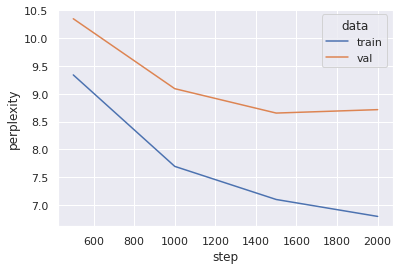

<Figure size 432x288 with 0 Axes>

In [29]:
ea1.plot_metric_hist("perplexity")

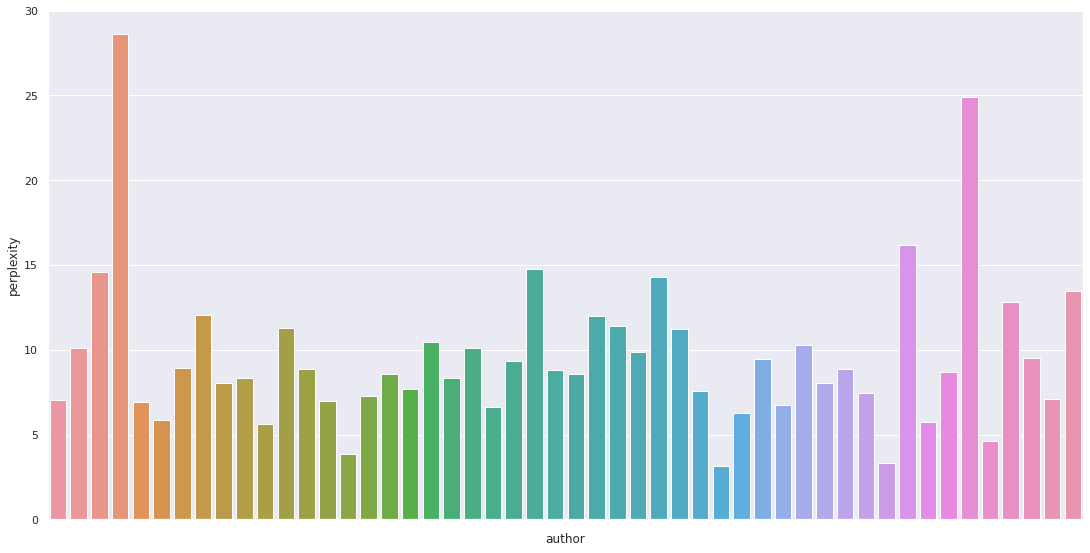

<Figure size 432x288 with 0 Axes>

In [47]:
ea2.plot_perf_by_author("perplexity")

In [ ]:
plot_user_perf_by_sample_count(ea2.author_result_df, user_counts, "perplexity")

r=-0.08604049118822453, p=0.5524362349920809


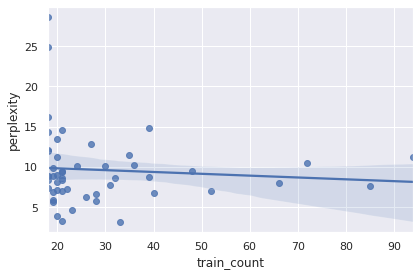

<Figure size 432x288 with 0 Axes>

In [50]:
plot_user_perf_by_sample_count(ea2.author_result_df, user_counts, "perplexity")

## Subject Fine-tune - 3 epochs + variable of steps

Experiment where # of times each sample is seen is consistent with prior experiment.

In [54]:
result_dir3 = os.path.join(base_result_dir, "3_distilbert_finetuned_author/epoch_3_run")

In [55]:
exp_analyzer3 = PerUserExpAnalyzer(result_dir3)

Found results for 50 users


In [56]:
exp_analyzer3.data_split_perf_df

,data_split,loss,perplexity,author
0,train,2.446107,11.543318,goodluckchuck11
1,eval,2.512982,12.341674,goodluckchuck11
2,test,2.500099,12.183702,goodluckchuck11
0,train,2.627633,13.840970,binarygold
1,eval,2.747965,15.610829,binarygold
...,...,...,...,...
1,eval,2.205610,9.075786,goodDayM
2,test,2.615734,13.677253,goodDayM
0,train,2.521257,12.444228,HelloImLucas
1,eval,2.639590,14.007453,HelloImLucas


In [57]:
test_df = exp_analyzer3.data_split_perf_df[exp_analyzer3.data_split_perf_df["data_split"] == "test"]

In [58]:
test_df.mean()

loss           2.591453
perplexity    14.962729
dtype: float64

In [59]:
test_df.std()

loss          0.465484
perplexity    8.287779
dtype: float64

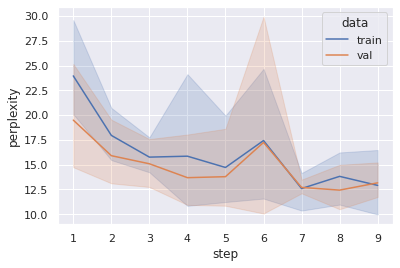

<Figure size 432x288 with 0 Axes>

In [60]:
exp_analyzer3.plot_metric_hist("perplexity")

# Subject Fine-tune - 2000 steps + variable number of epochs

Experiment where # training steps is consistents but # of times each sample is seen varies.

### Results for single user with 85 training examples (exab)

In [61]:
result_dir4 = os.path.join(base_result_dir, "3_distilbert_finetuned_author/exab")
ea4 = ExpAnalyzer(result_dir4)
ea4.data_split_perf_df

,data_split,loss,perplexity
0,train,0.314765,1.369938
1,eval,2.835886,17.045496
2,test,2.856753,17.404927


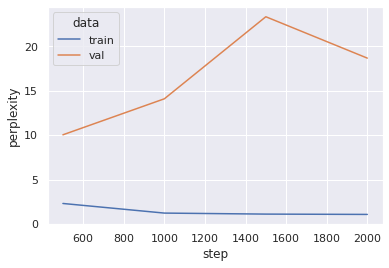

<Figure size 432x288 with 0 Axes>

In [63]:
ea4.plot_metric_hist("perplexity")

In [66]:
result_dir5 = os.path.join(base_result_dir, "3_distilbert_finetuned_author/epoch_3_run/exab")
ea5 = ExpAnalyzer(result_dir5)
ea5.data_split_perf_df

,data_split,loss,perplexity
0,train,2.464414,11.756593
1,eval,2.353150,10.518653
2,test,2.533715,12.600226


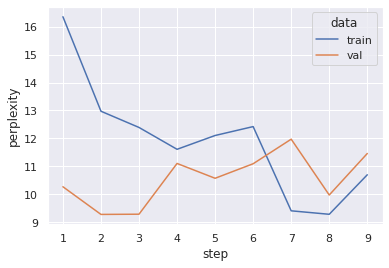

<Figure size 432x288 with 0 Axes>

In [67]:
ea5.plot_metric_hist("perplexity")

In [68]:
result_dir6 = os.path.join(base_result_dir, "3_distilbert_finetuned_author/Eriflee")
ea6 = ExpAnalyzer(result_dir6)
ea6.data_split_perf_df

,data_split,loss,perplexity
0,train,0.146799,1.158121
1,eval,3.676287,39.499448
2,test,3.336973,28.133828


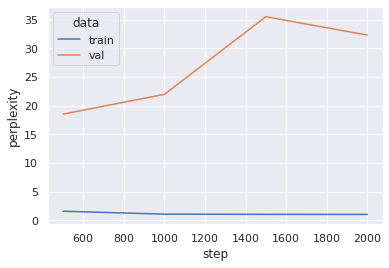

<Figure size 432x288 with 0 Axes>

In [69]:
ea6.plot_metric_hist("perplexity")

In [71]:
result_dir7 = os.path.join(base_result_dir, "3_distilbert_finetuned_author/epoch_3_run/Eriflee")
ea7 = ExpAnalyzer(result_dir7)
ea7.data_split_perf_df

,data_split,loss,perplexity
0,train,2.557902,12.908711
1,eval,2.514007,12.354330
2,test,2.360609,10.597401


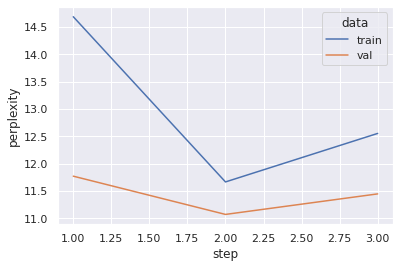

<Figure size 432x288 with 0 Axes>

In [72]:
ea7.plot_metric_hist("perplexity")

In [73]:
result_dir8 = os.path.join(base_result_dir, "3_distilbert_finetuned_author/")
ea8 = PerUserExpAnalyzer(result_dir8)

Found results for 5 users


In [74]:
ea8.data_split_perf_df

,data_split,loss,perplexity,author
0,train,0.127322,1.135782,escapevelo
1,eval,3.458401,31.766141,escapevelo
2,test,3.983747,53.717965,escapevelo
0,train,0.314765,1.369938,exab
1,eval,2.835886,17.045496,exab
2,test,2.856753,17.404927,exab
0,train,0.146799,1.158121,Eriflee
1,eval,3.676287,39.499448,Eriflee
2,test,3.336973,28.133828,Eriflee


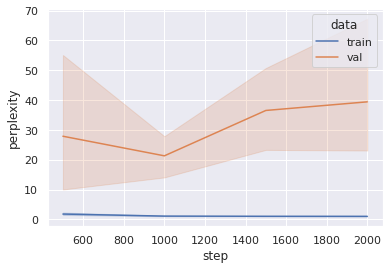

<Figure size 432x288 with 0 Axes>

In [75]:
ea8.plot_metric_hist("perplexity")

## Get Per-Subreddit Perf.

In [77]:
rd1 = os.path.join(base_result_dir, "1_bert_distill_pretrained")
ea1 = ExpAnalyzer(rd1)
ea1.data_split_perf_df

,data_split,loss,perplexity
0,eval,2.888228,17.961461
1,test,2.914612,18.441652


In [80]:
ea1.sr_result_df.mean()

loss           2.821629
perplexity    17.023798
dtype: float64

In [81]:
ea1.sr_result_df.std()

loss          0.175319
perplexity    3.052106
dtype: float64

In [89]:
rd9 = os.path.join(base_result_dir, "4_distilbert_finetuned_subreddit")
ea9 = PerPopulationExpAnalyzer(rd9, "subreddit")
ea9.data_split_perf_df

Found results for 6 sub-populations


,data_split,loss,perplexity,subreddit
0,train,2.266367,9.644300,AskDocs
1,eval,1.939589,6.955888,AskDocs
2,test,2.120498,8.335291,AskDocs
0,train,2.255851,9.543416,mentalhealth
1,eval,2.117081,8.306852,mentalhealth
2,test,2.188904,8.925424,mentalhealth
0,train,2.239104,9.384917,Bitcoin
1,eval,2.241042,9.403126,Bitcoin
2,test,2.308728,10.061623,Bitcoin
0,train,1.612975,5.017715,investing


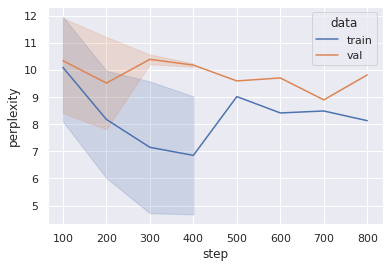

<Figure size 432x288 with 0 Axes>

In [90]:
ea9.plot_metric_hist("perplexity")

In [91]:
test_df = ea9.data_split_perf_df[ea9.data_split_perf_df["data_split"] == "test"]

In [92]:
test_df.mean()

loss          2.148838
perplexity    8.640876
dtype: float64

In [ ]:
test_df.std()

## Effect of constant LR

In [95]:
result_dir10 = os.path.join(base_result_dir, "2b_distilbert_finetuned_constant_lr")
ea10 = ExpAnalyzer(result_dir10)
ea10.data_split_perf_df

,data_split,loss,perplexity
0,train,2.034876,7.651303
1,eval,2.131445,8.427035
2,test,2.146064,8.551135


In [96]:
ea10.author_result_df.mean()

loss          2.168301
perplexity    9.537226
dtype: float64

In [97]:
ea10.author_result_df.std()

loss          0.415313
perplexity    4.424397
dtype: float64

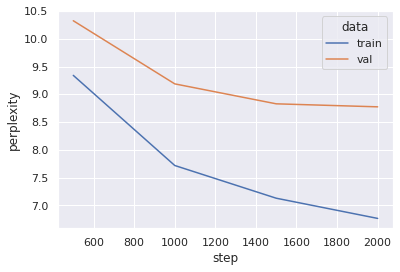

<Figure size 432x288 with 0 Axes>

In [100]:
ea10.plot_metric_hist("perplexity")

In [106]:
ea1.trainer_state

{'best_metric': 2.1578450202941895,
 'best_model_checkpoint': '/data/ddmg/redditlanguagemodeling/results/2_distilbert_finetuned_all/checkpoint-1500',
 'epoch': 3.0,
 'global_step': 2034,
 'is_hyper_param_search': False,
 'is_local_process_zero': True,
 'is_world_process_zero': True,
 'log_history': [{'epoch': 0.74,
   'learning_rate': 3.770894788593904e-05,
   'loss': 2.2341,
   'step': 500},
  {'epoch': 0.74,
   'eval_loss': 2.3367607593536377,
   'eval_runtime': 5.2304,
   'eval_samples_per_second': 90.432,
   'step': 500},
  {'epoch': 1.47,
   'learning_rate': 2.5417895771878074e-05,
   'loss': 2.0405,
   'step': 1000},
  {'epoch': 1.47,
   'eval_loss': 2.2072722911834717,
   'eval_runtime': 5.2234,
   'eval_samples_per_second': 90.554,
   'step': 1000},
  {'epoch': 2.21,
   'learning_rate': 1.3126843657817109e-05,
   'loss': 1.96,
   'step': 1500},
  {'epoch': 2.21,
   'eval_loss': 2.1578450202941895,
   'eval_runtime': 5.2264,
   'eval_samples_per_second': 90.502,
   'step': 1500}

In [102]:
ea10.trainer_state

{'best_metric': 2.1719396114349365,
 'best_model_checkpoint': '/data/ddmg/redditlanguagemodeling/results/2b_distilbert_finetuned_constant_lr/checkpoint-2000',
 'epoch': 3.0,
 'global_step': 2034,
 'is_hyper_param_search': False,
 'is_local_process_zero': True,
 'is_world_process_zero': True,
 'log_history': [{'epoch': 0.74,
   'learning_rate': 5e-05,
   'loss': 2.2345,
   'step': 500},
  {'epoch': 0.74,
   'eval_loss': 2.3346219062805176,
   'eval_runtime': 9.4906,
   'eval_samples_per_second': 49.839,
   'step': 500},
  {'epoch': 1.47, 'learning_rate': 5e-05, 'loss': 2.0437, 'step': 1000},
  {'epoch': 1.47,
   'eval_loss': 2.217987537384033,
   'eval_runtime': 9.4958,
   'eval_samples_per_second': 49.812,
   'step': 1000},
  {'epoch': 2.21, 'learning_rate': 5e-05, 'loss': 1.9643, 'step': 1500},
  {'epoch': 2.21,
   'eval_loss': 2.1781044006347656,
   'eval_runtime': 9.4945,
   'eval_samples_per_second': 49.818,
   'step': 1500},
  {'epoch': 2.95, 'learning_rate': 5e-05, 'loss': 1.9119

In [107]:
rd11 = os.path.join(base_result_dir, "3a_distilbert_finetuned_author_constant_lr")
ea11 = PerPopulationExpAnalyzer(rd11, "subreddit")
ea11.data_split_perf_df

Found results for 50 sub-populations


,data_split,loss,perplexity,subreddit
0,train,2.622854,13.774980,binarygold
1,eval,2.746658,15.590447,binarygold
2,test,2.897412,18.127168,binarygold
0,train,2.455534,11.652651,exab
1,eval,2.328001,10.257412,exab
...,...,...,...,...
1,eval,2.812618,16.653456,Creative310
2,test,3.080813,21.776103,Creative310
0,train,4.246050,69.829067,retardedinvestor
1,eval,3.445839,31.369589,retardedinvestor


In [108]:
test_df = ea11.data_split_perf_df[ea11.data_split_perf_df["data_split"] == "test"]

In [109]:
test_df.mean()

loss           2.578356
perplexity    14.790691
dtype: float64

In [110]:
test_df.std()

loss          0.471111
perplexity    8.140301
dtype: float64

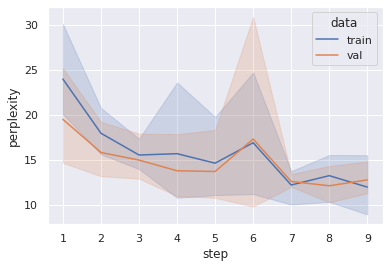

<Figure size 432x288 with 0 Axes>

In [111]:
ea11.plot_metric_hist("perplexity")